In [15]:
# Import libraries
import os

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file

In [2]:
# Define paths
CWD = os.getcwd()
DATA_DIR = 'aclImdb'
TRAIN_DIR = 'train'
TEST_DIR = 'test'
BOW_FILE = 'labeledBOW.feat'
VOCAB_FILE = 'imdb.vocab'

In [3]:
# Load in compressed BOW matrix for train data and store as dense matrix
train_bow, labels = load_svmlight_file(os.path.join(CWD, DATA_DIR, TRAIN_DIR, BOW_FILE))
dense_bow = train_bow.todense()

In [4]:
# Load in vocabulary file
with open(os.path.join(CWD, DATA_DIR, VOCAB_FILE)) as f:
    txt = f.read()
    vocab_dict = {word:i for i,word in enumerate(txt.split('\n'))}

In [5]:
def word_count(word_idx, bow):
    
    '''Returns the absolute count and number of reviews containing the given word index.'''
    
    return int(np.sum(bow[:,word_idx])), np.count_nonzero(bow[:,word_idx])

In [6]:
# Test word count
word = 'them'
word_count(vocab_dict[word], dense_bow)

(7967, 5596)

In [7]:
# Create example gendered word sets
gendered_sets = [('he','she','they'), ('him', 'her', 'them'), ('his','her', 'their'),
                ('himself','herself','themself'), ('man', 'woman', 'person'),
               ('men', 'women', 'people')]

In [9]:
# Extract word stats for each token
groups = []
male = []
female = []
neutral = []

for i in range(len(gendered_sets)):
    g_set = gendered_sets[i]
    
    groups.append(f"Group {i+1}:\n{g_set}")
    male.append(list(word_count(vocab_dict[g_set[0]], dense_bow)))
    female.append(list(word_count(vocab_dict[g_set[1]], dense_bow)))
    neutral.append(list(word_count(vocab_dict[g_set[0]], dense_bow)))
    
male = np.array(male)
female = np.array(female)
neutral = np.array(neutral)

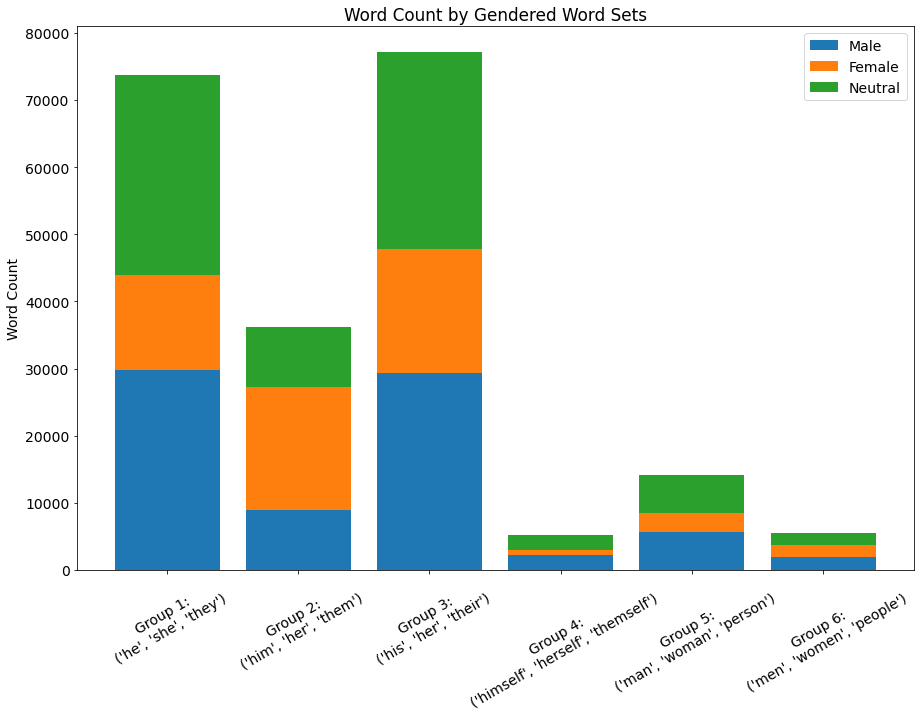

In [18]:
# Plot the word counts as stacked bar charts by word sets
matplotlib.rcParams.update({'font.size':14})
plt.figure(figsize=(15,10))
plt.bar(groups, male[:,0], label='Male')
plt.bar(groups, female[:,0], bottom=male[:,0], label='Female')
plt.bar(groups, neutral[:,0], bottom=male[:,0] + female[:,0], label='Neutral')

plt.title("Word Count by Gendered Word Sets")
plt.ylabel('Word Count')
plt.xticks(rotation=30)
plt.legend()
plt.show()

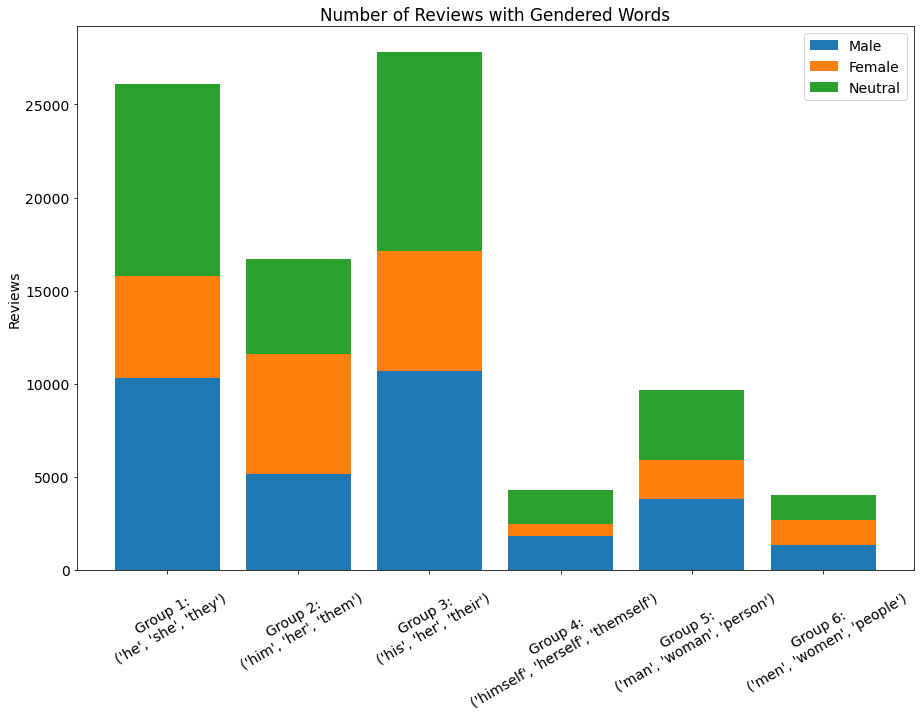

In [19]:
# Plot the number of reviews containing a word as stacked bar charts by word sets
plt.figure(figsize=(15,10))
plt.bar(groups, male[:,1], label='Male')
plt.bar(groups, female[:,1], bottom=male[:,1], label='Female')
plt.bar(groups, neutral[:,1], bottom=male[:,1] + female[:,1], label='Neutral')

plt.title("Number of Reviews with Gendered Words")
plt.ylabel('Reviews')
plt.xticks(rotation=30)
plt.legend()
plt.show()